In [1]:
import tifffile as tf
from scipy import ndimage
import numpy as np

import os
import glob
from importlib import reload

import warnings
warnings.filterwarnings( "ignore")
from matplotlib import pyplot as plt
%matplotlib inline

import walnut_utils as wnut

In [2]:
src = '../clean/'
dstc = '../clean2/'
dsts = '../shells_wtr/'
dstm = '../meats_wtr/'

struc1 = ndimage.generate_binary_structure(3, 1)
struc2 = ndimage.generate_binary_structure(3, 2)
struc2 = ndimage.generate_binary_structure(3, 3)

ssrange = [150,200,250,300]

Sx = [ np.s_[k,:,:] for k in ssrange ]
Sy = [ np.s_[:,k,:] for k in ssrange ]
Sz = [ np.s_[:,:,k] for k in ssrange ]

fs = 15

walnut_batch = sorted(glob.glob( src + '*/' ))
bidx = 2
walnut_files = sorted(glob.glob(walnut_batch[bidx] + '*.tif'))
bname = walnut_batch[bidx].split('/')[-2]

wdstc = dstc + bname + '/'
if not os.path.isdir(wdstc):
    os.makedirs(wdstc)

wdsts = dsts + bname + '/'
if not os.path.isdir(wdsts):
    os.makedirs(wdsts)
wdstsd = wdsts + 'diagnostic/'
if not os.path.isdir(wdstsd):
    os.makedirs(wdstsd)

wdstm = dstm + bname + '/'
if not os.path.isdir(wdstm):
    os.makedirs(wdstm)
wdstmd = wdstm + 'diagnostic/'
if not os.path.isdir(wdstmd):
    os.makedirs(wdstmd)
print(wdstmd)

../meats_wtr/2014SBa_R5_T49/diagnostic/


In [3]:
widx = 2
print(walnut_files[widx])
img = tf.imread(walnut_files[widx])

pa, fi = os.path.split(walnut_files[widx])
fname = os.path.splitext(fi)[0]
print(fname)

mxval = 2**(8*img.itemsize)-1

../clean/2014SBa_R5_T49/003.tif
003


# Remove additional air

In [4]:
sz = 7
dist1 = ndimage.distance_transform_cdt(img, metric='taxicab')

In [5]:
mask1 = (img > 120) | (dist1 > 15)
mask1 = ndimage.binary_dilation(mask1, struc1, 7, border_value=0)
mask1 = ndimage.binary_fill_holes(mask1)
mask1 = ndimage.binary_erosion(mask1, struc1, 7, border_value=1)
clean = mask1*img

In [10]:
if True:
    dist2 = ndimage.distance_transform_cdt(clean, metric='taxicab')
    mask2 = (clean > 150) | (dist2 > 10)
    mask2 = ndimage.binary_dilation(mask2, struc1, 7, border_value=0)
    mask2 = ndimage.binary_fill_holes(mask2)
    mask2 = ndimage.binary_erosion(mask2, struc1, 7, border_value=1)

    clean = mask2*img

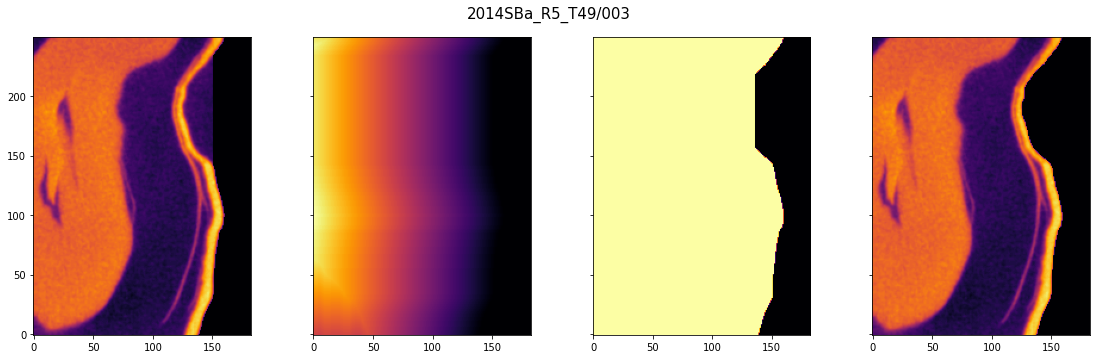

In [11]:
k = 220
ss = np.s_[150:400,k,250:]
#ss = np.s_[k,:,:]
#ss = np.s_[:,k,:]
#ss = np.s_[:,:,k]
    
fig, ax = plt.subplots(1,4,figsize=(16,5), sharex=True, sharey=True)
ax = np.atleast_1d(ax).flatten()

i = 0
ax[i].imshow(img[ss], cmap='inferno', origin='lower', vmax=255, vmin=0)
i = 1
ax[i].imshow(dist1[ss], cmap='inferno', origin='lower', vmin=0)
i = 2
ax[i].imshow(mask1[ss], cmap='inferno', origin='lower', vmax=1, vmin=0)
i = 3
ax[i].imshow(clean[ss], cmap='inferno', origin='lower', vmax=255, vmin=0)
fig.suptitle(bname + '/' + fname, fontsize=fs)

fig.tight_layout()

In [12]:
filename = wdstc + bname + '_' + fname + '.tif'
print(filename)
tf.imwrite(filename, clean, photometric='minisblack', compress=3)

../clean2/2014SBa_R5_T49/2014SBa_R5_T49_003.tif


In [24]:
print(img.shape)

(574, 467, 433)
